In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("data.csv")
X = df.to_numpy()

class Kmeans:
    """
    K-means clustering algorithm implementation.

    Attributes:
        k (int): The number of clusters.
        centroids (numpy.ndarray): The coordinates of the cluster centers.
        index_of_closest_centroid (numpy.ndarray): The cluster assignment for each data point.
    """
    def __init__(self, k=2):
        """
        Initializes the Kmeans object.

        Args:
            k (int): The number of clusters (default: 2).
        """
        self.k = k
        self.centroids = None
        self.index_of_closest_centroid = None

    def assign_centroid(self, X):
        """
        Randomly assigns initial centroids from the dataset.

        Args:
            X (numpy.ndarray): The input data of shape (m, n), where m is the number of samples and n is the number of features.
        """
        self.centroids = X[np.random.choice(X.shape[0], size=self.k, replace=False)]

    def calculate_absolute_distance(self, X):
        """
        Calculates the Euclidean distance between each data point and all centroids.

        Args:
            X (numpy.ndarray): The input data of shape (m, n).

        Returns:
            numpy.ndarray: A distance matrix of shape (m, k), where each element (i, j) represents the distance between data point i and centroid j.
        """
        difference = X[:, np.newaxis, :] - self.centroids  # Broadcasting for efficient distance calculation
        sum_of_squared_distance = np.linalg.norm(difference, axis=2) # Calculate Euclidean distance
        return sum_of_squared_distance


    def assign_to_centroid(self, distances):
        """
        Assigns each data point to the closest centroid based on the calculated distances.

        Args:
            distances (numpy.ndarray): The distance matrix of shape (m, k).

        Returns:
            numpy.ndarray: A list of cluster indices (0 to k-1) of shape (m,), indicating the closest centroid for each data point.
        """
        index_of_closest_centroid = np.argmin(distances, axis=1)
        return index_of_closest_centroid

    def calculate_centroid(self, X):
        """
        Calculates the new centroids by taking the mean of the data points assigned to each cluster.

        Args:
            X (numpy.ndarray): The input data of shape (m, n).
        """
        for each in range(self.k):
            cluster_index = np.where(self.index_of_closest_centroid == each)[0]
            if cluster_index.size > 0: # Check if the cluster is not empty. Important to avoid errors!
                self.centroids[each] = np.mean(X[cluster_index, :], axis=0)
            else:
                # Handle empty cluster: one strategy is to keep the old centroid
                pass # Or another strategy is to re-initialize it randomly
                # self.centroids[each] = X[np.random.choice(X.shape[0], size=1, replace=False)] # re-initialize randomly

    def calculate_cost(self, X):
        """
        Calculates the cost (inertia) of the current clustering, which is the sum of squared distances between each data point and its assigned centroid.

        Args:
            X (numpy.ndarray): The input data of shape (m, n).

        Returns:
            float: The cost of the current clustering.
        """
        cost = np.sum(np.min(np.sum(np.square(X[:, np.newaxis, :] - self.centroids),axis=2), axis = 1))
        return cost


    def fit(self, X):
        """
        Fits the K-means model to the input data by iteratively assigning data points to clusters and updating centroids until convergence or a maximum number of iterations is reached.

        Args:
            X (numpy.ndarray): The input data of shape (m, n).
        """
        self.assign_centroid(X)
        costs = []
        centroids = []

        for i in range(100):  # Maximum 100 iterations
            sum_of_squared_distance = self.calculate_absolute_distance(X)
            self.index_of_closest_centroid = self.assign_to_centroid(sum_of_squared_distance)

            cost = self.calculate_cost(X)
            

            self.calculate_centroid(X)
            costs.append(cost)
            centroids.append(self.centroids)

            if i > 1 and np.isclose(costs[i-1], cost):
                print(f"Convergence after {i} iteration")
                break
            print(f"Iteration {i+1}: Cost = {cost}")

        return centroids, costs

In [13]:
X = X[:, 1:]

In [14]:

# Sample NumPy array

km = Kmeans(k=3)
centroids, cost=km.fit(X)


Iteration 1: Cost = 316.27153377313743
Iteration 2: Cost = 267.1756706255335
Iteration 3: Cost = 266.65851962270557
Convergence after 3 iteration


<Axes: >

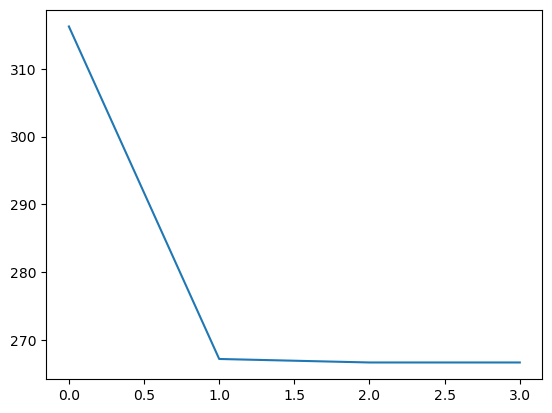

In [15]:
sns.lineplot(x=range(len(cost)),  y=cost)

<Axes: >

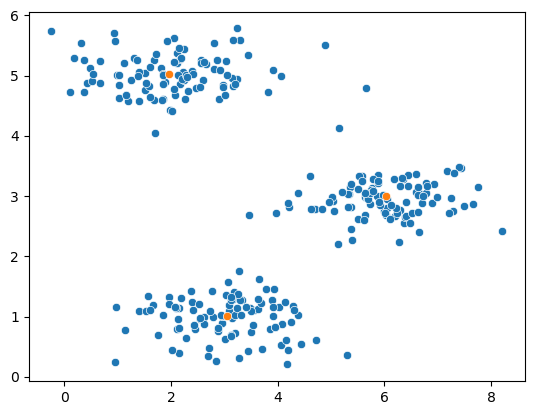

In [16]:
sns.scatterplot(x=X[:,0], y=X[:,1])
sns.scatterplot(x=centroids[-1][:,0], y=centroids[-1][:,1])